# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

Data loaded successfully.
Shape: (196453, 18)


,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,63rd Street Weather Station,09/27/2018 10:00:00 AM,16.40,12.2,61,0.0,0.0,260.3,0.0,231,2.5,4.7,996.3,484,356.0,11.9,09/27/2018 10:00 AM,63rdStreetWeatherStation201809271000
1,63rd Street Weather Station,09/27/2018 11:00:00 AM,17.10,11.5,51,0.0,0.0,260.3,0.0,244,3.6,5.7,995.4,468,356.0,11.9,09/27/2018 11:00 AM,63rdStreetWeatherStation201809271100
2,63rd Street Weather Station,09/27/2018 01:00:00 PM,18.20,12.4,51,0.0,0.0,260.3,0.0,248,3.1,5.3,994.8,377,355.0,11.9,09/27/2018 1:00 PM,63rdStreetWeatherStation201809271300
3,Foster Weather Station,09/27/2018 01:00:00 PM,17.89,NaN,39,NaN,0.0,NaN,NaN,249,1.4,2.3,993.6,0,NaN,15.1,09/27/2018 1:00 PM,FosterWeatherStation201809271300
4,63rd Street Weather Station,09/27/2018 03:00:00 PM,19.50,13.0,47,0.0,0.0,260.3,0.0,249,3.1,5.7,992.9,461,355.0,11.9,09/27/2018 3:00 PM,63rdStreetWeatherStation201809271500



Data types:
Station Name                    object
Measurement Timestamp           object
Air Temperature                float64
Wet Bulb Temperature           float64
Humidity                         int64
Rain Intensity                 float64
Interval Rain                  float64
Total Rain                     float64
Precipitation Type             float64
Wind Direction                   int64
Wind Speed                     float64
Maximum Wind Speed             float64
Barometric Pressure            float64
Solar Radiation                  int64
Heading                        float64
Battery Life                   float64
Measurement Timestamp Label     object
Measurement ID                  object
dtype: object

Parsed datetime column and set index to: Measurement Timestamp

.describe() for numeric columns:


,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,196378.000000,120436.000000,196453.000000,120436.000000,196453.000000,120436.000000,120436.000000,196453.000000,196453.000000,196453.000000,196307.000000,196453.000000,120436.000000,196453.000000
mean,12.612077,10.265719,68.020784,0.158835,0.142267,141.436046,4.268201,140.798919,2.918526,3.555857,994.314602,112.298468,282.010487,13.163492
std,10.442059,9.409096,15.630736,1.793505,1.096539,190.414352,15.591086,122.031330,5.340041,5.953454,10.027497,842.512722,142.741733,1.544643
min,-29.780000,-28.900000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100000.000000,0.000000,0.000000
25%,4.300000,3.000000,57.000000,0.000000,0.000000,16.700000,0.000000,10.000000,1.600000,1.200000,990.200000,0.000000,350.000000,11.900000
50%,13.700000,11.600000,69.000000,0.000000,0.000000,55.500000,0.000000,115.000000,2.900000,3.100000,994.400000,4.000000,354.000000,12.000000
75%,21.500000,18.400000,80.000000,0.000000,0.000000,200.500000,0.000000,260.000000,3.300000,5.200000,998.600000,131.000000,357.000000,15.100000
max,37.600000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,3098.500000,1277.000000,359.000000,15.300000



Missing values per column:


,missing_count,missing_percent
Station Name,0,0.00
Air Temperature,75,0.04
Wet Bulb Temperature,76017,38.69
Humidity,0,0.00
Rain Intensity,76017,38.69
Interval Rain,0,0.00
Total Rain,76017,38.69
Precipitation Type,76017,38.69
Wind Direction,0,0.00
Wind Speed,0,0.00



Saved dataset info to output/q1_data_info.txt
Saved numeric exploration summary to output/q1_exploration.csv


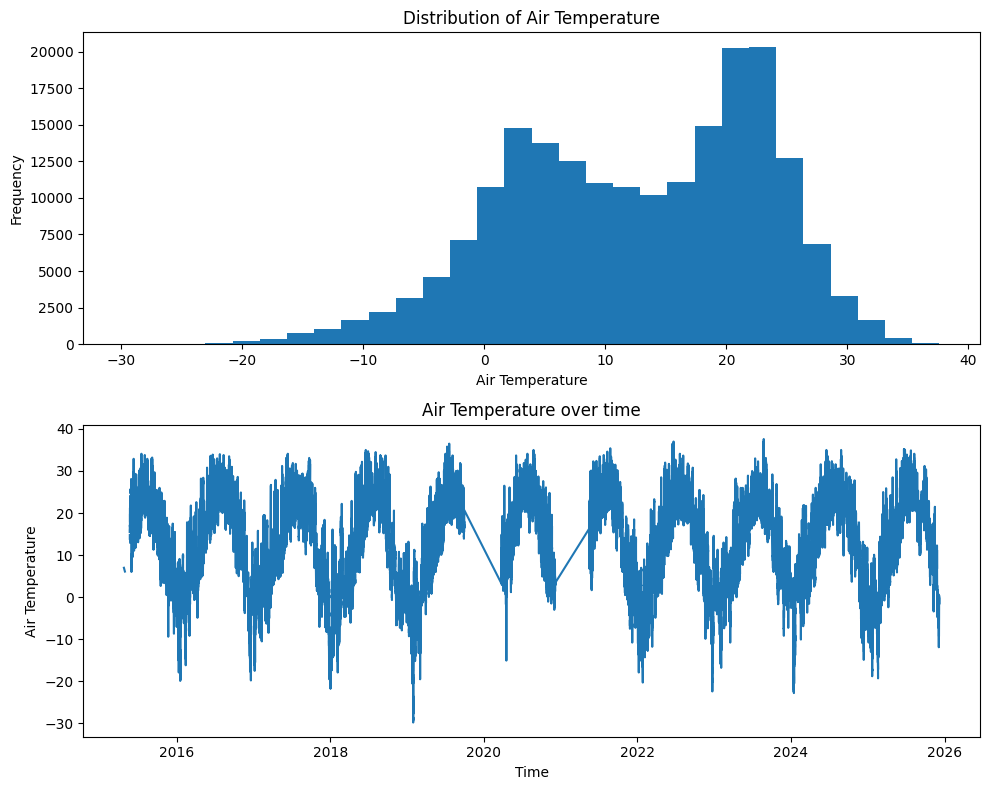

Saved visualizations to output/q1_visualizations.png


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

os.makedirs("output", exist_ok=True)

data_path = "data/beach_sensors.csv"
df = pd.read_csv(data_path)

print("Data loaded successfully.")
print(f"Shape: {df.shape}")
display(df.head())

print("\nData types:")
print(df.dtypes)

datetime_col = "Measurement Timestamp" 

if datetime_col in df.columns:
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")
    df = df.sort_values(datetime_col).set_index(datetime_col)
    print(f"\nParsed datetime column and set index to: {datetime_col}")
else:
    print("\nWARNING: 'Measurement Timestamp' column not found; using row index instead.")

print("\n.describe() for numeric columns:")
display(df.describe())

missing_counts = df.isna().sum()
missing_perc = (missing_counts / len(df)) * 100

print("\nMissing values per column:")
display(
    pd.DataFrame(
        {"missing_count": missing_counts, "missing_percent": missing_perc.round(2)}
    )
)

info_path = "output/q1_data_info.txt"

with open(info_path, "w") as f:
    f.write(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n\n")

    f.write("Column Names:\n")
    for col in df.columns:
        f.write(f"- {col}\n")
    f.write("\n")

    f.write("Data Types:\n")
    for col, dtype in df.dtypes.items():
        f.write(f"- {col}: {dtype}\n")
    f.write("\n")

    if isinstance(df.index, pd.DatetimeIndex):
        start_date = df.index.min()
        end_date = df.index.max()
        f.write("Date Range:\n")
        f.write(f"Start: {start_date}\n")
        f.write(f"End:   {end_date}\n\n")

    f.write("Missing Values:\n")
    for col in df.columns:
        count = int(missing_counts[col])
        perc = float(missing_perc[col])
        f.write(f"- {col}: {count} ({perc:.1f}%)\n")

print(f"\nSaved dataset info to {info_path}")

numeric_cols = df.select_dtypes(include=[np.number]).columns

exploration_rows = []
for col in numeric_cols:
    series = df[col]
    exploration_rows.append(
        {
            "column_name": col,
            "mean": float(series.mean()),
            "std": float(series.std()),
            "min": float(series.min()),
            "max": float(series.max()),
            "missing_count": int(series.isna().sum()),
        }
    )

exploration_df = pd.DataFrame(exploration_rows)
exploration_csv_path = "output/q1_exploration.csv"
exploration_df.to_csv(exploration_csv_path, index=False)

print(f"Saved numeric exploration summary to {exploration_csv_path}")


import matplotlib.dates as mdates

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

target_col = "Air Temperature" if "Air Temperature" in df.columns else numeric_cols[0]

axes[0].hist(df[target_col].dropna(), bins=30)
axes[0].set_title(f"Distribution of {target_col}")
axes[0].set_xlabel(target_col)
axes[0].set_ylabel("Frequency")

if isinstance(df.index, pd.DatetimeIndex):
    axes[1].plot(df.index, df[target_col])
    axes[1].set_title(f"{target_col} over time")
    axes[1].set_xlabel("Time")
    axes[1].set_ylabel(target_col)
    axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())
    axes[1].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axes[1].xaxis.get_major_locator()))
else:
    axes[1].plot(df[target_col].reset_index(drop=True))
    axes[1].set_title(f"{target_col} by row index (no datetime index)")
    axes[1].set_xlabel("Row index")
    axes[1].set_ylabel(target_col)

plt.tight_layout()

viz_path = "output/q1_visualizations.png"
fig.savefig(viz_path, dpi=150)
plt.show()

print(f"Saved visualizations to {viz_path}")

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.
